<a href="https://colab.research.google.com/github/anthonybabich/cap-comp215/blob/main/Covid_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Covid Dashboard**
--------------------------

####Author: Anthony Babich

####Date: 2023-02-19

The Purpose of this Project is to summarize and display the key metrics of COVID-19 data in BC





In [40]:
import datetime, json, requests
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates
from pprint import pprint  
import pandas as pd
import seaborn as sns
%matplotlib inline
!pip install jupyter-dash
!pip install dash dash-core-components dash-html-components
import dash
import dash_html_components as html
import dash_core_components as dcc
from jupyter_dash import JupyterDash



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to parameterize the dashboard:

For the location value you need to enter the specific geography to filter to. This can be one or more two-letter province/territory codes or health region unique identifiers. 

*   Link for province/territory codes: https://github.com/ccodwg/CovidTimelineCanada/blob/main/geo/pt.csv
*   Link for health region unique identifiers: https://github.com/ccodwg/CovidTimelineCanada/blob/main/geo/hr.csv

For the date value you need to enter a date in the (YYYY-MM-DD) format. It will include data only from after and including this date.






In [41]:
location = input("Enter the location code or identifier: ")
date = input("Enter the start date: ")

query = f'https://api.opencovid.ca/summary?geo=hr&loc={location}&after={date}'


response = requests.request("GET", query, headers={}, data={})
print(response.text)

Enter the location code or identifier: BC
Enter the start date: 2021-11-01
{"data":[{"region":"BC","sub_region_1":"591","date":"2021-11-01","cases":31025.0,"cases_daily":95.0,"deaths":277.0,"deaths_daily":7.0},{"region":"BC","sub_region_1":"592","date":"2021-11-01","cases":105301.0,"cases_daily":133.0,"deaths":1050.0,"deaths_daily":8.0},{"region":"BC","sub_region_1":"593","date":"2021-11-01","cases":43606.0,"cases_daily":38.0,"deaths":541.0,"deaths_daily":0.0},{"region":"BC","sub_region_1":"594","date":"2021-11-01","cases":10974.0,"cases_daily":45.0,"deaths":96.0,"deaths_daily":5.0},{"region":"BC","sub_region_1":"595","date":"2021-11-01","cases":15602.0,"cases_daily":70.0,"deaths":217.0,"deaths_daily":5.0},{"region":"BC","sub_region_1":"591","date":"2021-11-02","cases":31114.0,"cases_daily":89.0,"deaths":278.0,"deaths_daily":1.0},{"region":"BC","sub_region_1":"592","date":"2021-11-02","cases":105508.0,"cases_daily":207.0,"deaths":1050.0,"deaths_daily":0.0},{"region":"BC","sub_region_1"

In [42]:
covid_data = json.loads(response.text)
pprint(covid_data)

Streaming output truncated to the last 5000 lines.
           'sub_region_1': '591'},
          {'cases': 169090.0,
           'cases_daily': 17.0,
           'date': '2022-10-07',
           'deaths': 1783.0,
           'deaths_daily': 0.0,
           'region': 'BC',
           'sub_region_1': '592'},
          {'cases': 78235.0,
           'cases_daily': 29.0,
           'date': '2022-10-07',
           'deaths': 1017.0,
           'deaths_daily': 0.0,
           'region': 'BC',
           'sub_region_1': '593'},
          {'cases': 38664.0,
           'cases_daily': 20.0,
           'date': '2022-10-07',
           'deaths': 494.0,
           'deaths_daily': 0.0,
           'region': 'BC',
           'sub_region_1': '594'},
          {'cases': 31125.0,
           'cases_daily': 5.0,
           'date': '2022-10-07',
           'deaths': 380.0,
           'deaths_daily': 0.0,
           'region': 'BC',
           'sub_region_1': '595'},
          {'cases': 68882.0,
           'cases_d

Extacting the data with list comprehensions for the graphs


In [43]:
data = covid_data['data']
total_cases = [d['cases'] for d in data]
daily_cases = [d['cases_daily'] for d in data]
total_deaths = [d['deaths'] for d in data]
daily_deaths = [d['deaths_daily'] for d in data]
case_dates =  [d['date'] for d in data]
datetime_objects = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in case_dates]
dates = [dt.date() for dt in datetime_objects]
get_regions = [d['region'] for d in data]
region = get_regions[0]
sub_region_names = [d['sub_region_1'] for d in data]


print(total_cases)
print(daily_cases)
print(total_deaths)
print(daily_deaths)
print(dates)
print(region)
print(sub_region_names)

[31025.0, 105301.0, 43606.0, 10974.0, 15602.0, 31114.0, 105508.0, 43661.0, 11025.0, 15643.0, 31221.0, 105731.0, 43710.0, 11081.0, 15805.0, 31332.0, 105916.0, 43786.0, 11148.0, 15909.0, 31470.0, 106147.0, 43844.0, 11237.0, 15993.0, 31603.0, 106320.0, 43898.0, 11319.0, 16046.0, 31695.0, 106504.0, 43954.0, 11392.0, 16082.0, 31757.0, 106627.0, 43998.0, 11450.0, 16178.0, 31867.0, 106834.0, 44048.0, 11540.0, 16287.0, 31987.0, 106981.0, 44110.0, 11620.0, 16389.0, 32125.0, 107155.0, 44164.0, 11683.0, 16452.0, 32235.0, 107295.0, 44199.0, 11738.0, 16582.0, 32314.0, 107437.0, 44247.0, 11804.0, 16658.0, 32400.0, 107578.0, 44276.0, 11866.0, 16734.0, 32441.0, 107718.0, 44314.0, 11901.0, 16772.0, 32491.0, 107830.0, 44375.0, 11936.0, 16850.0, 32583.0, 108005.0, 44444.0, 12005.0, 16913.0, 32732.0, 108139.0, 44505.0, 12071.0, 16993.0, 32820.0, 108249.0, 44567.0, 12132.0, 17070.0, 32894.0, 108384.0, 44601.0, 12191.0, 17121.0, 32967.0, 108493.0, 44637.0, 12238.0, 17195.0, 33038.0, 108584.0, 44666.0, 12275

####Data statistics



In [44]:
cases_statistics = (d['cases'] for d in data)
cases_sum = sum(cases_statistics)
print(cases_sum)

daily_cases_statistics = (d['cases_daily'] for d in data)
daily_cases_sum = sum(daily_cases_statistics)
print(daily_cases_sum)

deaths_statistics = (d['deaths'] for d in data)
deaths_statistics_sum = sum(deaths_statistics)
print(deaths_statistics_sum)


170021848.0
189548.0
1778290.0


Creating Charts and plots

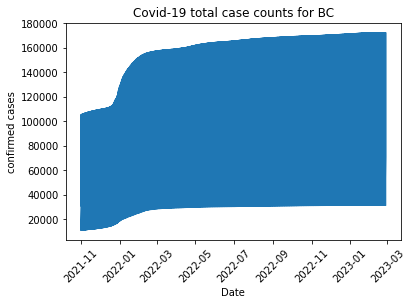

In [45]:
fig, ax = plt.subplots()
ax.plot(dates, total_cases)
plt.xticks(rotation=45)
ax.set_xlabel('Date')
ax.set_ylabel('confirmed cases')
title = f'Covid-19 total case counts for {region}'
_ = ax.set_title(title)





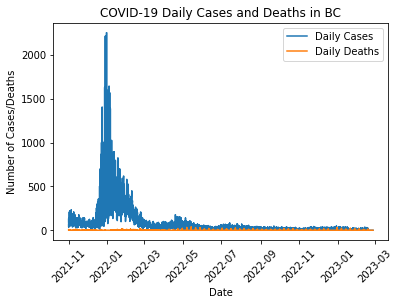

In [46]:
plt.plot(dates, daily_cases, label='Daily Cases')
plt.plot(dates, daily_deaths, label='Daily Deaths')


plt.xlabel('Date')
plt.ylabel('Number of Cases/Deaths')
title = f'COVID-19 Daily Cases and Deaths in {region}'
plt.title(title)
plt.xticks(rotation=45)

plt.legend()


plt.show()

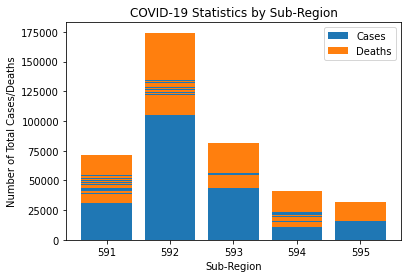

In [47]:
fig, ax = plt.subplots()
ax.bar(sub_region_names, total_cases, label='Cases')
ax.bar(sub_region_names, total_deaths, bottom=total_cases, label='Deaths')
ax.set_xlabel('Sub-Region')
ax.set_ylabel('Number of Total Cases/Deaths')
ax.set_title('COVID-19 Statistics by Sub-Region')
_ = ax.legend()

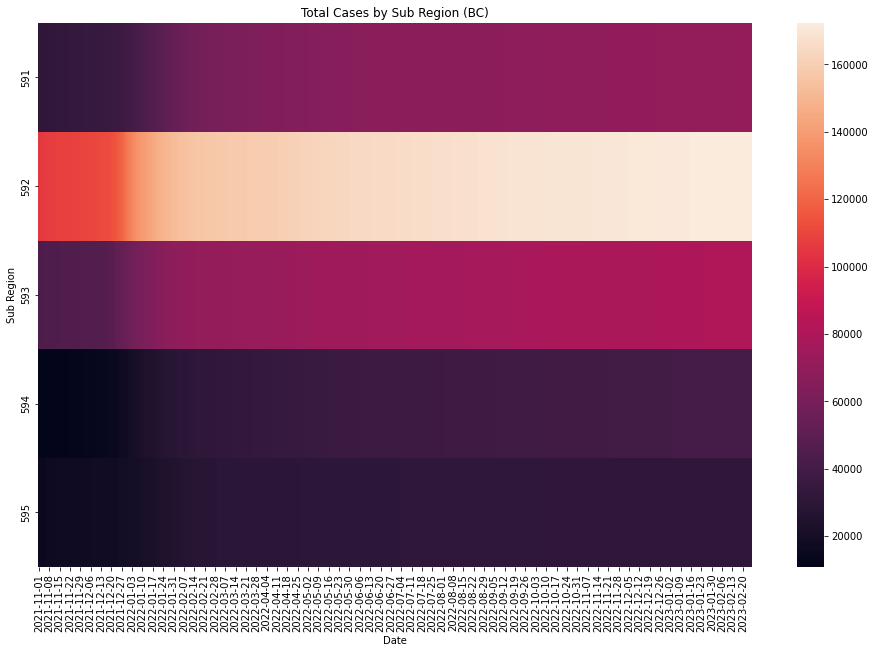

In [48]:

df = pd.DataFrame({
    'date': dates,
    'region': get_regions,
    'sub_region': sub_region_names,
    'total_cases': total_cases
})


matrix = df.pivot_table(index='sub_region', columns='date', values='total_cases')


plt.figure(figsize=(16, 10))
sns.heatmap(matrix)
plt.title(f"Total Cases by Sub Region ({region})")
plt.xlabel("Date")
plt.ylabel("Sub Region")
plt.show()








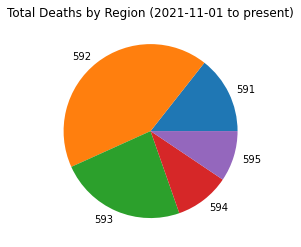

In [49]:
deaths_by_region = {}
for i in range(len(sub_region_names)):
    region = sub_region_names[i]
    deaths = total_deaths[i]
    if region not in deaths_by_region:
        deaths_by_region[region] = deaths
    else:
        deaths_by_region[region] += deaths


plt.pie(deaths_by_region.values(), labels=deaths_by_region.keys())
plt.title(f'Total Deaths by Region ({date} to present)')
plt.show()



**COVID-19 Dashboard**
---------------------

In [50]:
get_regions = [d['region'] for d in data]
region = get_regions[0]

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1('COVID-19 Dashboard'),
     html.Div([
        html.P(f'Total Cases from {date} to present: {cases_sum}'),
        html.P(f'Daily Cases from {date} to present: {daily_cases_sum}'),
        html.P(f'Total Deaths from {date} to present: {deaths_statistics_sum}'),
    ]),
    dcc.Graph(
        id='total-cases-graph',
        figure={
            'data': [
                {'x': dates, 'y': total_cases, 'type': 'line', 'name': 'Total Cases'},
                
            ],
            'layout': {
                'title': f'Total Case Counts for {region}',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'confirmed cases'},
                'legend': {'x': 0, 'y': 1}
            }
        }
    ),
    dcc.Graph(
        id='sub-region-graph',
        figure={
            'data': [
                {'x': sub_region_names, 'y': total_cases, 'type': 'bar', 'name': 'Cases'},
                {'x': sub_region_names, 'y': total_deaths, 'type': 'bar', 'name': 'Deaths'}
            ],
            'layout': {
                'title': 'COVID-19 Statistics by Sub-Region',
                'xaxis': {'title': 'Sub-Region'},
                'yaxis': {'title': 'Number of Total Cases/Deaths'},
                'barmode': 'stack',
                'legend': {'x': 0, 'y': 1}
            }
        }
    ),
    dcc.Graph(
        id='heatmap-graph',
        figure={
            'data': [
                {'z': matrix.values.tolist(), 'x': matrix.columns.tolist(), 'y': matrix.index.tolist(), 'type': 'heatmap'}
            ],
            'layout': {
                'title': f'Total Cases by Sub Region ({region})',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Sub Region'}
            }
        }
    ),
    dcc.Graph(
        id='deaths-by-region-graph',
        figure={
            'data': [
                {'values': list(deaths_by_region.values()), 'labels': list(deaths_by_region.keys()), 'type': 'pie'}
            ],
            'layout': {
                'title': f'Total Deaths by Region ({date} to present)'
            }
        }
    ),
    dcc.Graph(
        id='daily-cases-deaths-graph',
        figure={
            'data': [
                {'x': dates, 'y': daily_cases, 'type': 'line', 'name': 'Daily Cases'},
                {'x': dates, 'y': daily_deaths, 'type': 'line', 'name': 'Daily Deaths'}
            ],
            'layout': {
                'title': f'COVID-19 Daily Cases and Deaths in {region}',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Number of Cases/Deaths'},
                'legend': {'x': 0, 'y': 1}
            }
        }
    )
])


app.run_server(mode='inline')

<IPython.core.display.Javascript object>

**Interpreting the dashboard**
--------------------------
####Total Case Counts:



> This chart shows how the total number of confirmed COVID-19 cases in the region have changed over time. The x-axis shows the dates, and the y-axis shows the corresponding total case counts.

####COVID_19 Statistics by Subregion:



> This chart compares the total number of COVID-19 cases and deaths for each sub-region, with the cases bar on the bottom and the deaths bar stacked on top

####Total Cases by Subregion:



> This is a heat map that shows the total cases for each subregion overtime. The x axis shows the dates and the y axis shows the sub regions. Darker red colours show a higher number of cases, more specifcally 150 k and above. Lighter red, lighter blue, and the colour inbetween show case numbers below 150 k but above 50k. Dark blue colours show case numbers 50 k and below 


####Total Deaths by Region



> This is a pie chart that shows the total deaths by region. To the side of the pie chart the regions and their colors are shown

####Daily Cases and Deaths 



> This graph shows the daily number of COVID-19 cases and deaths over time in the region being analyzed. The x axis shows dates and the y axis shows the number of daily Cases/Deaths.











